<center><h1>Project title: Seasonal Bike Rentals Prediction in Seoul </h1></center> <br>

This project aims to optimize bike rental operations in Seoul by leveraging data-driven insights. </br>

By analyzing various factors affecting bike rentals, we can improve resource allocation, enhance user experience, and potentially increase revenue for the bike rental service.

<h1>Project Objective</h1>

Identify and quantify the top 3-5 factors influencing bike rental demand in Seoul, providing actionable insights for operational decision-making. <br>
Develop a regression model to predict hourly bike rental demand with at least 85% accuracy <br>
Design and deploy an interactive web application using Streamlit, allowing users to test the regression model through an intuitive interface.

<h1>Project Phases</h1>

<h2>Phase One</h2>

<ul>
    <li>Data Acquisition: Gathering relevant datasets for analysis. </li>
    <li>Data Exploration: Analyzing data to understand its structure and key characteristics. </li>
    <li>Data Cleaning & Preprocessing: Preparing the data for modeling by handling missing values, outliers, etc. </li>
</ul>

<h2>Phase Two</h2>

<ul>
    <li>Feature Engineering: Creating new features or modifying existing ones to improve model performance. </li>
    <li>Model Building & Selection: Developing and selecting the best regression model for predicting bike rental demand. </li>
    <li>Model Evaluation & Training: Evaluating model performance and fine-tuning as necessary. </li>
</ul>

<h2>Phase Three</h2>
<ul>
    <li>Streamlit App GUI: Designing the graphical user interface for the web application. </li>
    <li>Deployment: Deploying the web application on a cloud platform (e.g., AWS/GCP) for public use. </li>
</ul>ublic use.

<h1>Phase One Implementation</h1>

<h2>Metadata for Seoul Bike data</h2>

<h3> Attribute information</h3> 
Source: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
<ul>
    <li><b>Date</b>  - Date bike was rented</li>
    <li><b>Rented Bike count</b> - Count of bikes rented at each hour</li>
    <li><b>Hour</b> - Hour of he day</li>
    <li><b>Temperature</b>-Temperature in Celsius</li>
    <li><b>Humidity</b> - Humidity %</li>
    <li><b>Windspeed</b></b> - In m/s</li>
    <li><b>Visibility - Visibility within 10m radius</li>
    <li><b>Dew point temperature</b>- Celsius</li>
    <li><b>Solar radiation</b> - MJ/m2</li>
    <li><b>Rainfall</b> - In mm</li>
    <li><b>Snowfall</b> - Snowfall (cm)</li>
    <li><b>Seasons</b> - Winter, Spring, Summer, Autumn</li>
    <li><b>Holiday</b> - Holiday/No holiday</li>
    <li><b>Functional Day</b> - NoFunc(Non Functional Hours), Fun(Functional hours)- Whetehr day is neither a weekend nor holiday (Work_Day)</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../dataset/SeoulBikeData.csv', encoding='Windows-1252')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<h2>Data Exploration</h2>

In [5]:
df = data.copy()

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
df.shape

(8760, 14)

In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [8]:
# Are there duplicates
len(df[df.duplicated()])

0

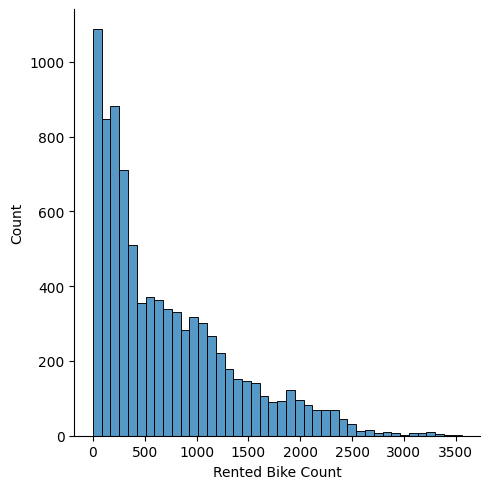

In [9]:
# Checking distribution of bike rentals

sns.displot(df['Rented Bike Count'])

What does Functioning Day represent? There are no bike rentals for 'No' only 'Yes' - Can this be dropped off as its not adding any value?

In [10]:
# Creating additional features Week day and Month

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y") 
df['month'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.day_name()
df.columns
df.dtypes

# Order months in the right order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
#df.sort_values(by='Date',inplace=True)

# Order week days in the right order
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=cats, ordered=True)
#df.sort_values(by='Date',inplace=True)

In [11]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday


C:\Users\khonj\AppData\Local\Temp\ipykernel_12776\626064279.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pivot = df.groupby(['month','Weekday'])['Rented Bike Count'].sum().reset_index()
C:\Users\khonj\AppData\Local\Temp\ipykernel_12776\626064279.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  month_pivot=df_pivot.pivot_table(values='Rented Bike Count',index='Weekday',columns='month')


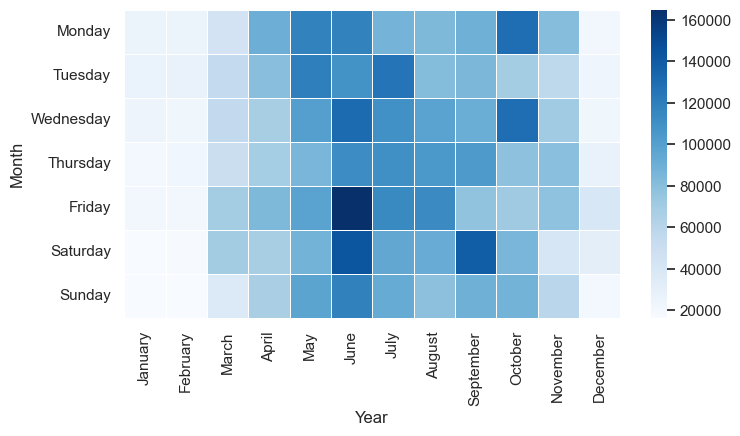

In [12]:
# Hitmap of bike rentals by Month and weekday
# ============================================================================================
df_pivot = df.groupby(['month','Weekday'])['Rented Bike Count'].sum().reset_index()
df_pivot

month_pivot=df_pivot.pivot_table(values='Rented Bike Count',index='Weekday',columns='month')

sns.set_theme(rc={'figure.figsize':(8,4)})

sns.heatmap(month_pivot, 
            cmap='Blues',
            linecolor='white',
            linewidth=0.5)

plt.ylabel("Month")
plt.xlabel("Year")

plt.show()

<Axes: >

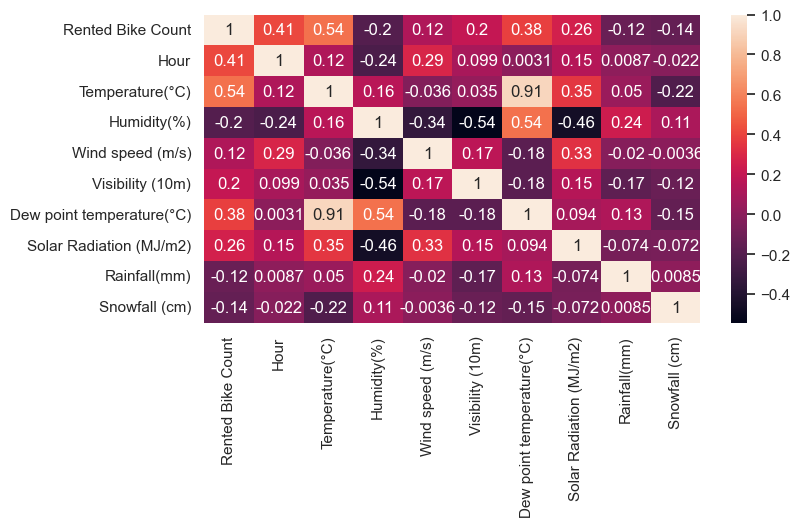

In [13]:
# Selecting only numeric columns - drops of Seasons

df_numeric = df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True)

C:\Users\khonj\AppData\Local\Temp\ipykernel_12776\1918780228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month')['Rented Bike Count'].sum().plot(kind='bar')


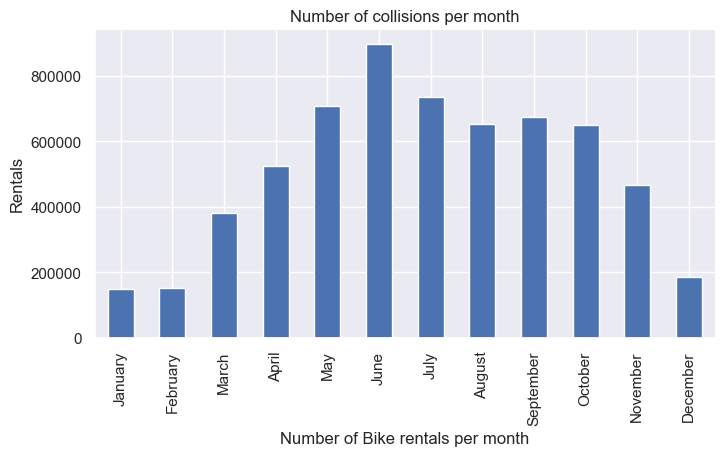

In [14]:

df.groupby('month')['Rented Bike Count'].sum().plot(kind='bar') 
#sns.barplot(x="month", y="Rented Bike Count", data=df)
plt.title("Number of collisions per month")
plt.ylabel("Rentals")
plt.xlabel("Number of Bike rentals per month")

sns.despine(left=False, bottom=False)
plt.show()


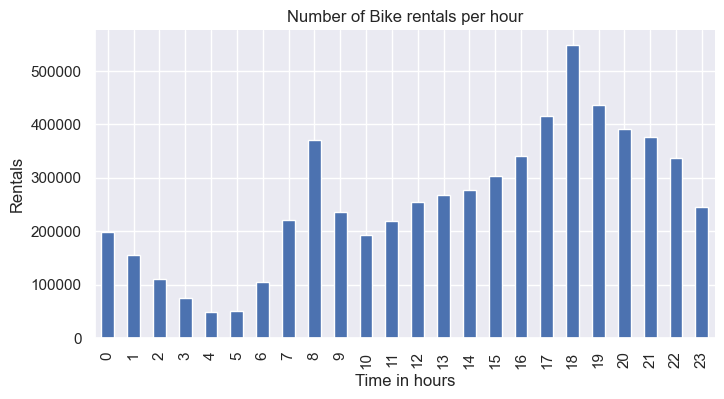

In [15]:
df.groupby('Hour')['Rented Bike Count'].sum().plot(kind='bar') 
plt.title("Number of Bike rentals per hour")
plt.ylabel("Rentals")
plt.xlabel("Time in hours")

sns.despine(left=False, bottom=False)
plt.show()

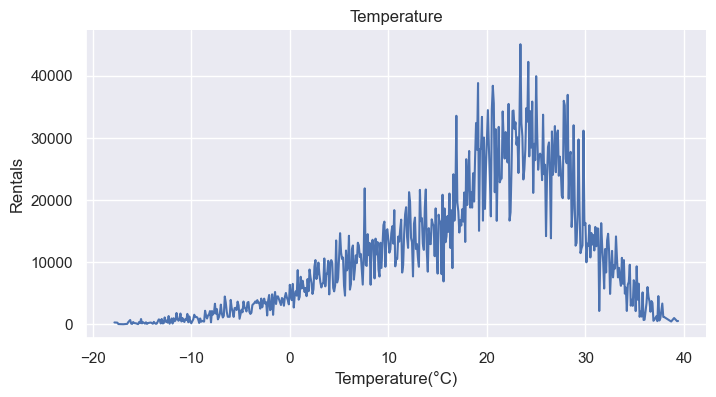

In [16]:
df.groupby('Temperature(°C)')['Rented Bike Count'].sum().plot() 
plt.title("Temperature")
plt.ylabel("Rentals")
plt.xlabel("Temperature(°C)")

sns.despine(left=False, bottom=False)
plt.show()

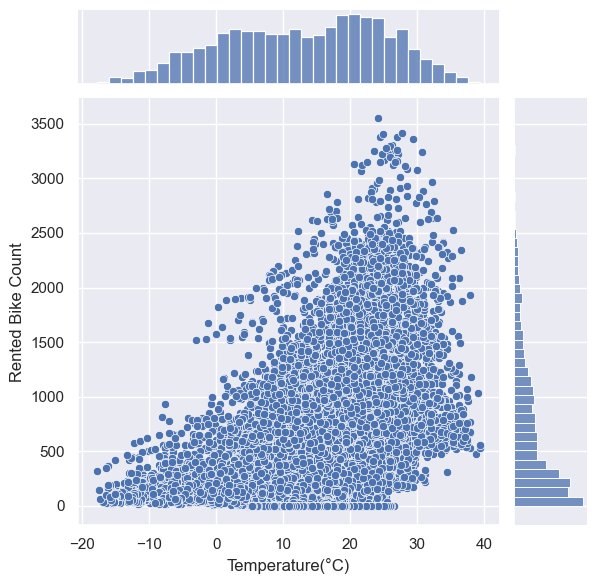

In [17]:
sns.jointplot(data=df, x = 'Temperature(°C)', y = 'Rented Bike Count')

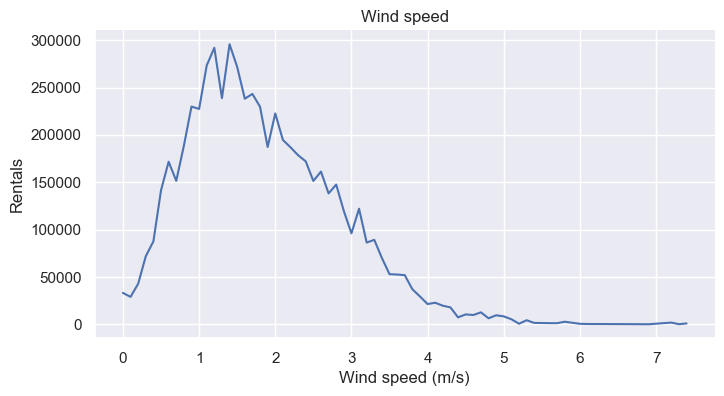

In [18]:


df.groupby('Wind speed (m/s)')['Rented Bike Count'].sum().plot() 
plt.title("Wind speed")
plt.ylabel("Rentals")
plt.xlabel("Wind speed (m/s)")

sns.despine(left=False, bottom=False)
plt.show()

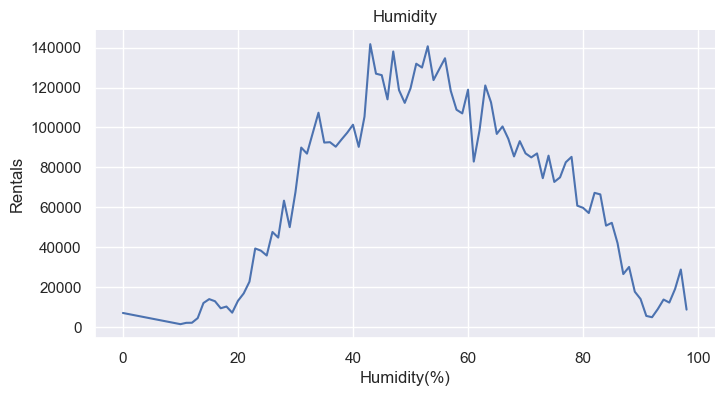

In [19]:
df.groupby('Humidity(%)')['Rented Bike Count'].sum().plot() 
plt.title("Humidity")
plt.ylabel("Rentals")
plt.xlabel("Humidity(%)")

sns.despine(left=False, bottom=False)
plt.show()

In [20]:
# What are bike rentals by different Spatial features? 

df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()


,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


In [21]:
Season_analysis = df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

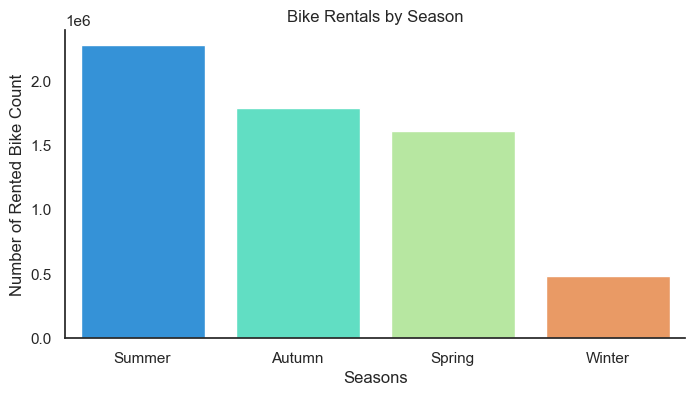

In [22]:
# Set the theme to white
sns.set_theme(style="white")
sns.set_theme(rc={'figure.figsize':(8,4)})


sns.set_theme(rc={'figure.figsize':(8,4)},palette='Blues_d')
sns.set_style(style='white')

sns.barplot(x='Seasons', y='Rented Bike Count', data=Season_analysis, 
             palette='rainbow',
            hue ="Seasons")

plt.title("Bike Rentals by Season")
plt.ylabel("Number of Rented Bike Count")
plt.xlabel("Seasons")

# Remove Top and Right borders
sns.despine(left=False, bottom=False)

plt.show()

In [23]:
df.groupby('month')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

C:\Users\khonj\AppData\Local\Temp\ipykernel_12776\2452026277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()


,month,Rented Bike Count
0,June,896887
1,July,734460
2,May,707088
3,September,673612
4,August,651887
5,October,650675
6,April,524227
7,November,465715
8,March,380594
9,December,185330


In [24]:
df.groupby('Weekday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

C:\Users\khonj\AppData\Local\Temp\ipykernel_12776\2443030914.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Weekday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()


,Weekday,Rented Bike Count
0,Friday,950334
1,Wednesday,923956
2,Monday,911743
3,Saturday,885492
4,Thursday,861999
5,Tuesday,858596
6,Sunday,780194


In [25]:
df.groupby('Hour')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

,Hour,Rented Bike Count
0,18,548568
1,19,436229
2,17,415556
3,20,390172
4,21,376479
5,8,370731
6,16,339677
7,22,336821
8,15,302653
9,14,276971


In [26]:
(df.groupby(["Seasons","Humidity(%)", "Wind speed (m/s)"])['Rented Bike Count'].sum()).T

Seasons  Humidity(%)  Wind speed (m/s)
Autumn   13           1.6                 681
         14           1.1                 675
                      1.7                 635
         15           1.1                 608
         16           2.0                 752
                                         ... 
Winter   96           3.0                 170
         97           0.4                 391
                      0.5                 174
                      1.2                  32
                      1.4                  62
Name: Rented Bike Count, Length: 5479, dtype: int64